# Regresión logística

# Dataset: Breast Cancer Wisconsin (Diagnostic)

## Descripción General
**Nombre**: Breast Cancer Wisconsin Diagnostic Dataset  
**Tipo**: Dataset de clasificación médica binaria  
**Origen**: Universidad de Wisconsin, Hospitales de Madison (1995)  
**Muestras**: 569 casos (212 malignos/357 benignos)  
**Características**: 30 atributos numéricos  
**Distribución**: 62.7% benignos, 37.3% malignos  

## Estructura
```python
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
# Claves: ['data', 'target', 'feature_names', 'target_names', 'DESCR', 'filename']

# Descripción detallada de las variables del dataset Breast Cancer Wisconsin

## Variables objetivo
| Nombre | Valor | Descripción | Tipo | Distribución |
|--------|-------|-------------|------|--------------|
| target | 0 | Tumor maligno (canceroso) | Binario | 212 casos (37.3%) |
| target | 1 | Tumor benigno (no canceroso) | Binario | 357 casos (62.7%) |

## Variables predictoras (30 características numéricas)
Todas las características representan medidas de núcleos celulares y se agrupan en:

### 1. Medidas de tendencia central (mean)
| Nombre | Descripción | Unidad | Rango típico |
|--------|-------------|--------|--------------|
| mean radius | Radio promedio de los núcleos | píxeles | 6-28 |
| mean texture | Desviación estándar de los valores de escala de grises | adimensional | 9-40 |
| mean perimeter | Perímetro promedio de los núcleos | píxeles | 43-190 |
| mean area | Área promedio de los núcleos | píxeles² | 143-2500 |
| mean smoothness | Variación local en longitudes de radio | adimensional | 0.05-0.16 |
| mean compactness | Perímetro²/área - 1.0 | adimensional | 0.02-0.35 |
| mean concavity | Severidad de las porciones cóncavas del contorno | adimensional | 0.0-0.43 |
| mean concave points | Número de porciones cóncavas del contorno | adimensional | 0.0-0.20 |
| mean symmetry | Simetría del núcleo | adimensional | 0.11-0.30 |
| mean fractal dimension | "Aproximación a la costa" - 1.0 | adimensional | 0.05-0.10 |

### 2. Medidas de dispersión (standard error)
| Nombre | Descripción | Interpretación |
|--------|-------------|----------------|
| radius error | Error estándar del radio | Variabilidad del tamaño nuclear |
| texture error | Error estándar de la textura | Consistencia de los patrones de grises |
| perimeter error | Error estándar del perímetro | Uniformidad de la forma |
| area error | Error estándar del área | Estabilidad del área celular |
| smoothness error | Error estándar de la suavidad | Consistencia de bordes |
| compactness error | Error estándar de la compacidad | Regularidad de la forma |
| concavity error | Error estándar de la concavidad | Variabilidad de depresiones |
| concave points error | Error estándar de puntos cóncavos | Consistencia de indentaciones |
| symmetry error | Error estándar de simetría | Regularidad de la simetría |
| fractal dimension error | Error estándar de dimensión fractal | Complejidad del patrón |

### 3. Valores extremos (worst)
| Nombre | Descripción | Importancia clínica |
|--------|-------------|---------------------|
| worst radius | Mayor radio observado | Indica células más grandes |
| worst texture | Mayor textura observada | Patrones anormales |
| worst perimeter | Mayor perímetro observado | Células más irregulares |
| worst area | Mayor área observada | Tamaño celular máximo |
| worst smoothness | Mayor suavidad observada | Bordes más irregulares |
| worst compactness | Mayor compacidad observada | Formas más anormales |
| worst concavity | Mayor concavidad observada | Depresiones más marcadas |
| worst concave points | Más puntos cóncavos observados | Indentaciones pronunciadas |
| worst symmetry | Peor simetría observada | Asimetría extrema |
| worst fractal dimension | Mayor dimensión fractal | Complejidad máxima |

## Relaciones clave:
1. Las características de "radius", "perimeter" y "area" suelen estar altamente correlacionadas
2. Las medidas "worst" son particularmente importantes para diagnóstico
3. "concavity" y "concave points" son predictores fuertes de malignidad
4. La "texture" refleja la heterogeneidad nuclear

In [4]:
# Importar librerías necesarias
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Cargar el dataset y convertirlo a DataFrame
cancer_data = load_breast_cancer()
df = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)

# Añadir la columna target al DataFrame
df['target'] = cancer_data.target

# Mapear los valores numéricos a etiquetas comprensibles
df['diagnosis'] = df['target'].map({0: 'Maligno', 1: 'Benigno'})

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,Maligno
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,Maligno
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,Maligno
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,Maligno
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,Maligno


In [6]:
# Información básica del DataFrame
print("\nInformación del dataset:")
print(f"Número de muestras: {len(df)}")
print(f"Número de características: {len(cancer_data.feature_names)}")
print(f"Distribución de clases:\n{df['diagnosis'].value_counts()}")


Información del dataset:
Número de muestras: 569
Número de características: 30
Distribución de clases:
diagnosis
Benigno    357
Maligno    212
Name: count, dtype: int64


In [8]:
cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error',
       'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
X = df[cancer_data.feature_names]
y = df['target']

Seleccionamos aleatoriamente la base de datos de entrenamiento y de prueba

In [11]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [14]:
#Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [49]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [50]:
# Hacer predicciones
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

In [17]:
y_pred

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [18]:
y_pred_proba

array([3.21189451e-02, 9.50131633e-01, 9.83515146e-01, 1.05941489e-03, 2.85319392e-01, 1.37690081e-03, 9.99994981e-01, 1.52997631e-03,
       9.81705879e-01, 6.55507086e-11, 9.99982708e-01, 9.91642527e-01, 2.52482630e-03, 8.68692026e-01, 9.98678339e-01, 2.85665639e-01,
       4.59774521e-05, 8.60743393e-01, 9.99371213e-01, 9.86254523e-01, 9.92286406e-01, 8.91754572e-01, 9.77545574e-01, 1.46908931e-05,
       9.20974649e-07, 8.57338450e-01, 9.98306440e-01, 9.88005356e-01, 8.62457967e-04, 7.89572681e-05, 8.81229901e-01, 6.87921003e-08,
       9.91624036e-01, 9.99335487e-01, 1.71875350e-07, 9.99658654e-01, 8.34892247e-01, 9.98957313e-01, 9.92338749e-01, 9.05089862e-01,
       9.45639107e-01, 1.04030906e-03, 9.99938478e-01, 9.99998886e-01, 9.98678782e-01, 6.23278235e-01, 9.03598486e-01, 9.99761214e-01,
       9.99740872e-01, 7.53538445e-04, 9.99391182e-01, 9.91323849e-01, 2.31047892e-06, 3.59849942e-06, 9.98991371e-01, 9.90250882e-01,
       1.41309297e-04, 9.98629873e-01, 8.52290263e-01, 

Realizamos un reporte de evaluación del modelo

In [19]:
# Evaluar el modelo
print("\nResultados de la clasificación:")
print(classification_report(y_test, y_pred, target_names=['Maligno', 'Benigno']))


Resultados de la clasificación:
              precision    recall  f1-score   support

     Maligno       0.98      0.98      0.98        64
     Benigno       0.99      0.99      0.99       107

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



In [22]:
y_test.value_counts()

target
1    107
0     64
Name: count, dtype: int64

In [20]:
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print(f"\nExactitud (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}")

# Coeficientes del modelo (importancia de características)
coef_df = pd.DataFrame({
    'Feature': cancer_data.feature_names,
    'Importance': model.coef_[0]
}).sort_values('Importance', ascending=False)

print("\nTop 10 características más importantes:")
display(coef_df.head(10))


Matriz de confusión:
[[ 63   1]
 [  1 106]]

Exactitud (Accuracy): 0.9883
AUC-ROC: 0.9981

Top 10 características más importantes:


,Feature,Importance
5,mean compactness,0.652655
15,compactness error,0.568702
11,texture error,0.367761
19,fractal dimension error,0.349557
18,symmetry error,0.324894
16,concavity error,0.163745
9,mean fractal dimension,0.036185
25,worst compactness,0.035920
8,mean symmetry,-0.113813
29,worst fractal dimension,-0.164264


In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, roc_auc_score, confusion_matrix, 
                            classification_report)
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar el dataset Iris y convertirlo a DataFrame
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# 2. Crear variable binaria: 1 si es versicolor, 0 si no
df['target'] = np.where(iris.target == 1, 1, 0)  # 1=versicolor, 0=otras (setosa, virginica)

In [25]:

# 3. Análisis exploratorio básico
print("Distribución de clases:")
print(df['target'].value_counts())
print("\nEstadísticas descriptivas:")
print(df.describe())

Distribución de clases:
target
0    100
1     50
Name: count, dtype: int64

Estadísticas descriptivas:
       sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)      target
count         150.000000        150.000000         150.000000        150.000000  150.000000
mean            5.843333          3.057333           3.758000          1.199333    0.333333
std             0.828066          0.435866           1.765298          0.762238    0.472984
min             4.300000          2.000000           1.000000          0.100000    0.000000
25%             5.100000          2.800000           1.600000          0.300000    0.000000
50%             5.800000          3.000000           4.350000          1.300000    0.000000
75%             6.400000          3.300000           5.100000          1.800000    1.000000
max             7.900000          4.400000           6.900000          2.500000    1.000000


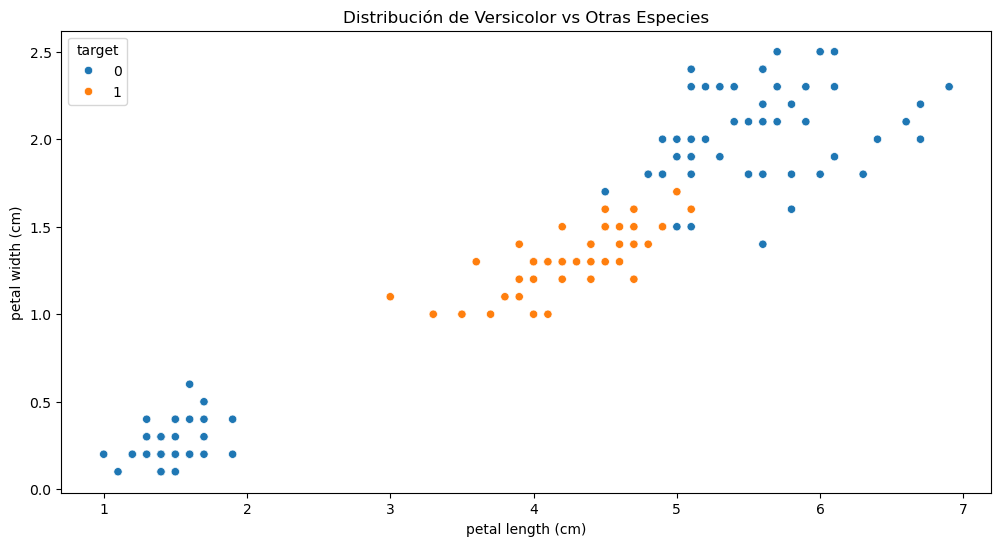

In [ ]:

    # 4. Visualización de datos
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='target', data=df)
    plt.title('Distribución de Versicolor vs Otras Especies')
    plt.show()

In [27]:
# 6. Dividir en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [45]:
# 8. Crear y entrenar modelo de regresión logística
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# 9. Hacer predicciones
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probabilidades para clase 1 (versicolor)


In [42]:
X_test_scaled[0,:]

array([-1.05932828, -1.47108897, -0.16636351, -0.16605468])

In [32]:
y_pred

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0])

In [33]:
y_pred_proba

array([0.71525184, 0.18310222, 0.57570819, 0.14733502, 0.36054316, 0.66028344, 0.18195217, 0.33321327, 0.05501848, 0.36141655,
       0.07221494, 0.31803046, 0.50816934, 0.29091151, 0.19949493, 0.60764697, 0.0706257 , 0.57899324, 0.05631525, 0.01787789,
       0.04223642, 0.5821423 , 0.47117927, 0.52033994, 0.30865949, 0.02363695, 0.15004386, 0.40146647, 0.28514592, 0.76896919,
       0.27742821, 0.56374878, 0.13109339, 0.09915463, 0.28797404, 0.07122779, 0.7468971 , 0.50352144, 0.764057  , 0.16912683,
       0.36085665, 0.31379537, 0.16037706, 0.44679485, 0.47117927])

In [31]:
 model.intercept_

array([-0.91374192])

In [30]:
model.coef_

array([[ 0.28131459, -1.42494881,  0.67273024, -0.89408671]])

$$

P(Y = 1) =  \frac{exp(0.91374192 +\hat 0.28131459 X_1 -1.42494881 x_2 +  0.67273024 x_3  -0.89408671 x_4 )}{1+exp( 0.91374192 + \hat  0.28131459 X_1 -1.42494881 X_2 +  0.67273024 x_3 -0.89408671 x_4 )} 


$$
x1: petat length (estand)
x2: petal width (estand)
x3: seapl length (estand)
x4: sepal width (estand)


Evaluación del modelo

In [47]:
y_test.value_counts()

target
0    30
1    15
Name: count, dtype: int64


Métricas de evaluación:
Exactitud (Accuracy): 0.6889
Precisión (Precision): 0.5455
Sensibilidad (Recall): 0.4000
Puntuación F1: 0.4615
AUC-ROC: 0.7156

Matriz de confusión:


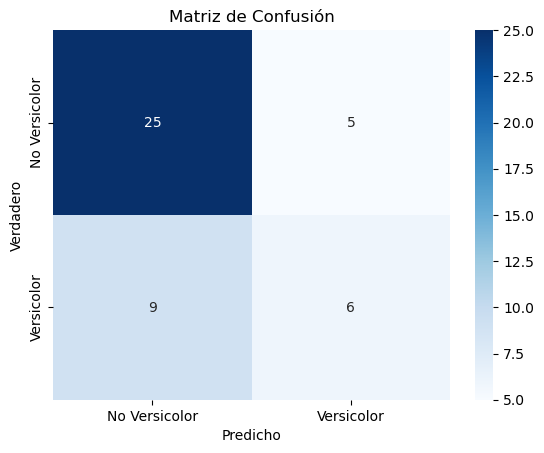


Reporte de clasificación completo:
               precision    recall  f1-score   support

No Versicolor       0.74      0.83      0.78        30
   Versicolor       0.55      0.40      0.46        15

     accuracy                           0.69        45
    macro avg       0.64      0.62      0.62        45
 weighted avg       0.67      0.69      0.67        45



In [48]:

# 10. Evaluar el modelo
print("\nMétricas de evaluación:")
print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
print(f"Precisión (Precision): {precision_score(y_test, y_pred):.4f}")
print(f"Sensibilidad (Recall): {recall_score(y_test, y_pred):.4f}")
print(f"Puntuación F1: {f1_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}")

print("\nMatriz de confusión:")
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Versicolor', 'Versicolor'],
            yticklabels=['No Versicolor', 'Versicolor'])
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.title('Matriz de Confusión')
plt.show()

print("\nReporte de clasificación completo:")
print(classification_report(y_test, y_pred, target_names=['No Versicolor', 'Versicolor']))

In [ ]:

# 11. Importancia de las características
coef_df = pd.DataFrame({
    'Característica': iris.feature_names,
    'Coeficiente': model.coef_[0],
    'Importancia Absoluta': np.abs(model.coef_[0])
}).sort_values('Importancia Absoluta', ascending=False)

print("\nImportancia de las características:")
display(coef_df)

# 12. Visualización de coeficientes
plt.figure(figsize=(10, 6))
sns.barplot(x='Coeficiente', y='Característica', data=coef_df)
plt.title('Coeficientes de la Regresión Logística')
plt.show()

# Árbol de decisión

In [74]:
from sklearn.tree import DecisionTreeClassifier

#model = LogisticRegression(random_state=42)

model = DecisionTreeClassifier(
    max_depth=3,        # Profundidad máxima del árbol
    min_samples_split=5, # Mínimo de muestras para dividir un nodo
    min_samples_leaf=5,  # Mínimo de muestras en hojas
    random_state=42
)

model.fit(X_train_scaled, y_train)

# 9. Hacer predicciones
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probabilidades para clase 1 (versicolor)


In [75]:
y_pred_proba

array([1. , 0. , 0.6, 0. , 0. , 1. , 0. , 0.2, 0. , 1. , 0. , 0. , 1. , 1. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.2, 1. , 1. ,
       0. , 0. , 0. , 0. , 0. , 1. , 1. , 0. , 0. , 1. , 0. , 0.6, 0.6, 0. , 0. , 0. , 0. , 1. , 1. , 0.2])


Métricas de evaluación:
Exactitud (Accuracy): 0.9333
Precisión (Precision): 0.8750
Sensibilidad (Recall): 0.9333
Puntuación F1: 0.9032
AUC-ROC: 0.9578

Matriz de confusión:


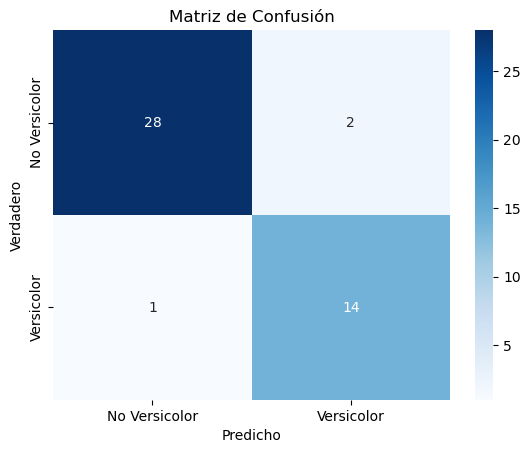


Reporte de clasificación completo:
               precision    recall  f1-score   support

No Versicolor       0.97      0.93      0.95        30
   Versicolor       0.88      0.93      0.90        15

     accuracy                           0.93        45
    macro avg       0.92      0.93      0.93        45
 weighted avg       0.94      0.93      0.93        45



In [76]:

# 10. Evaluar el modelo
print("\nMétricas de evaluación:")
print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
print(f"Precisión (Precision): {precision_score(y_test, y_pred):.4f}")
print(f"Sensibilidad (Recall): {recall_score(y_test, y_pred):.4f}")
print(f"Puntuación F1: {f1_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}")

print("\nMatriz de confusión:")
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Versicolor', 'Versicolor'],
            yticklabels=['No Versicolor', 'Versicolor'])
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.title('Matriz de Confusión')
plt.show()

print("\nReporte de clasificación completo:")
print(classification_report(y_test, y_pred, target_names=['No Versicolor', 'Versicolor']))